## READING DATASET

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


In [66]:
data=pd.read_csv('mobile_price_range_data.csv')
df=pd.DataFrame(data)

In [67]:
df.shape

(2000, 21)

In [68]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [69]:
df.duplicated().sum()

0

In [70]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [71]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Checking for null values


In [73]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No Null values in the dataset

## Statistical Summary of Dataset


In [74]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Checking Outliers

In [75]:
from pandas.io.formats.style_render import DataFrame
for i in df.columns[5:11]:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    ll=q1-(1.5*IQR)
    ul=q3+(1.5*IQR)
    outliers=[x for x in df[i] if x<ll or x>ul]
    print(len(outliers))
    

0
0
0
0
0
0


## Splitting training and testing data

In [76]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(1300, 20)
(700, 20)
(1300,)
(700, 20)


## VISUALIZATION OR EXPLORATARY DATA ANALYSIS

<AxesSubplot:xlabel='price_range', ylabel='count'>

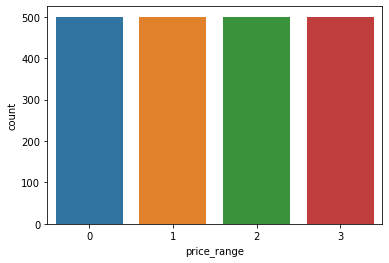

In [77]:
sns.countplot(df['price_range'])

<function matplotlib.pyplot.show(close=None, block=None)>

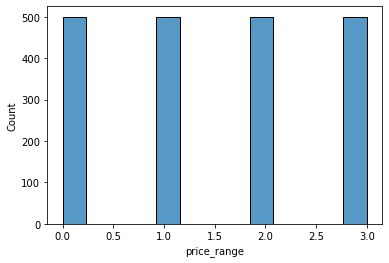

In [78]:
sns.histplot(x='price_range',data=df,)
plt.show

<AxesSubplot:>

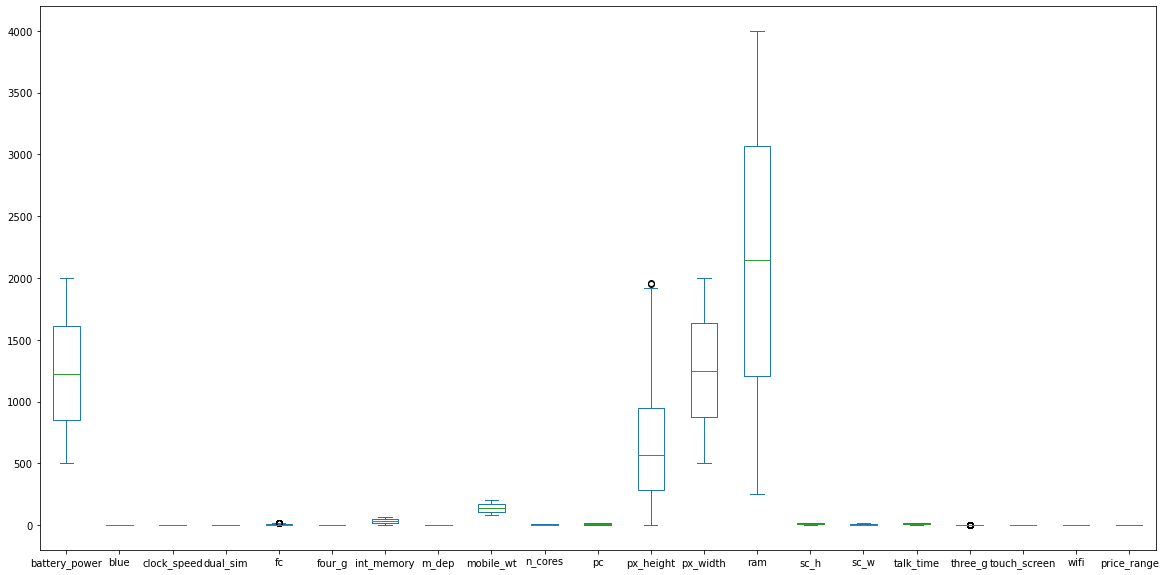

In [80]:
df.plot(kind='box',figsize=(20,10))

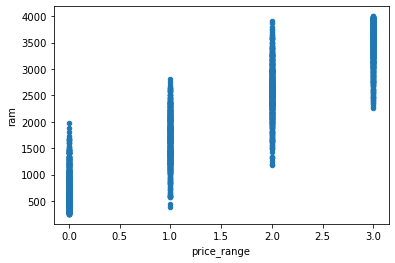

In [81]:
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

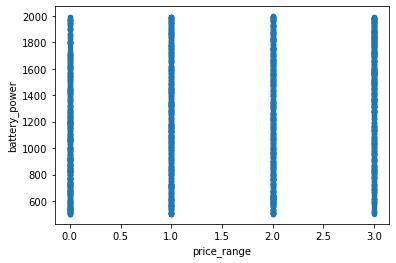

In [82]:
df.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

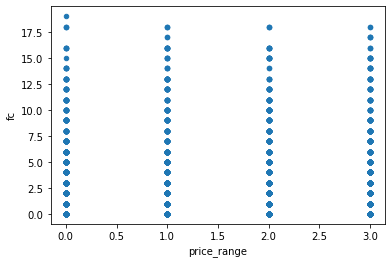

In [83]:
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

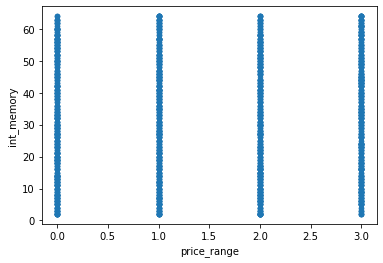

In [84]:
df.plot(x='price_range',y='int_memory',kind='scatter')
plt.show()

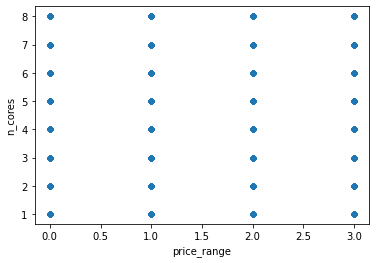

In [85]:
df.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

## Standardisation

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Logistic Regression

In [87]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [88]:
print('Accuracy of Train Score:',logistic_reg.score(x_train,y_train))
print('Accuracy of Test Score:',logistic_reg.score(x_test,y_test))
log_reg_prediction = logistic_reg.predict(x_test)
print(confusion_matrix(y_test,log_reg_prediction))
print(classification_report(y_test,log_reg_prediction))

Accuracy of Train Score: 0.9746153846153847
Accuracy of Test Score: 0.9571428571428572
[[182   4   0   0]
 [  3 166   5   0]
 [  0   6 157   4]
 [  0   0   8 165]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       186
           1       0.94      0.95      0.95       174
           2       0.92      0.94      0.93       167
           3       0.98      0.95      0.96       173

    accuracy                           0.96       700
   macro avg       0.96      0.96      0.96       700
weighted avg       0.96      0.96      0.96       700



## KNN CLASSIFIER

In [89]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [90]:
print('Accuracy of Train Score:',knn.score(x_train,y_train))
print('Accuracy of Test Score:',knn.score(x_test,y_test))
knn_yprediction = knn.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,knn_yprediction)
print(cm)
print(classification_report(y_test,knn_yprediction))

Accuracy of Train Score: 0.6915384615384615
Accuracy of Test Score: 0.5842857142857143
[[130  52   4   0]
 [ 54  82  34   4]
 [  4  48  83  32]
 [  0  10  49 114]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       186
           1       0.43      0.47      0.45       174
           2       0.49      0.50      0.49       167
           3       0.76      0.66      0.71       173

    accuracy                           0.58       700
   macro avg       0.59      0.58      0.59       700
weighted avg       0.59      0.58      0.59       700



## SVM CLASSIFIER (LINEAR)

In [91]:
from sklearn.svm import SVC
svc_linear=SVC(kernel='linear',C=14)
print(svc_linear.fit(x_test,y_test))
svc_linear_prediction=svc_linear.predict(x_test)
print(svc_linear_prediction)
SVC()

SVC(C=14, kernel='linear')
[1 1 1 2 2 0 0 2 1 1 3 1 3 3 3 3 1 1 0 2 0 1 1 1 3 2 1 1 2 1 2 3 1 2 2 2 2
 0 2 3 3 2 3 1 0 3 0 0 2 0 2 3 3 2 1 0 2 1 0 1 2 1 3 3 1 0 3 3 2 1 0 3 3 2
 0 0 0 1 0 0 2 1 3 2 3 3 1 0 1 0 1 0 3 2 1 2 3 1 3 1 0 2 2 1 3 1 0 3 2 2 0
 2 1 2 2 2 1 2 0 3 2 1 0 1 0 2 0 3 2 2 0 3 1 1 2 3 3 3 2 2 0 1 2 2 2 3 0 3
 1 1 0 0 2 1 2 2 1 0 0 3 0 0 0 0 3 2 1 3 0 3 2 3 1 1 2 2 0 2 2 1 3 3 1 1 0
 2 1 3 0 0 2 3 0 3 1 2 2 0 2 1 0 3 0 3 1 2 1 2 0 2 1 2 3 2 0 1 0 2 2 0 0 1
 0 0 2 2 0 3 2 2 2 1 1 0 3 1 2 2 1 0 1 1 2 0 3 3 1 0 0 0 3 3 0 2 1 2 3 3 1
 0 1 0 2 1 0 0 0 0 0 1 0 3 0 3 2 0 0 2 2 1 0 2 0 3 1 3 3 3 3 1 3 1 0 3 1 2
 2 3 1 0 2 1 3 2 1 1 3 0 0 3 1 3 2 2 3 1 0 1 3 2 1 1 1 1 0 3 0 0 1 0 3 2 2
 1 3 2 0 0 0 3 0 1 1 2 0 1 1 0 3 0 2 3 1 0 0 3 1 1 1 0 0 3 1 0 0 2 3 1 0 3
 0 0 1 3 2 1 3 3 3 1 0 0 2 1 2 2 3 1 3 1 3 3 2 2 3 2 2 0 2 0 2 0 2 3 1 2 0
 0 0 1 0 0 0 1 3 3 3 2 3 3 2 1 1 2 1 0 2 2 0 3 3 0 3 1 1 2 3 0 0 1 3 2 0 0
 1 3 0 1 3 0 1 3 0 0 2 1 2 3 2 2 2 3 1 3 3 3 0 0 0 1 2 3 3 1 2 2 3 3 3 3 

SVC()

In [92]:
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear',C=14)
svc_linear.fit(x_train,y_train)

SVC(C=14, kernel='linear')

In [93]:
print('Accuracy of Train Score :',svc_linear.score(x_train,y_train))
print('Accuracy of Test Score :',svc_linear.score(x_test,y_test))
svc_linear_prediction = svc_linear.predict(x_test)
cm = confusion_matrix(y_test,svc_linear_prediction)
print("confusion Matrix",cm)
cls_report = classification_report(y_test,svc_linear_prediction)
print(cls_report)

Accuracy of Train Score : 0.9876923076923076
Accuracy of Test Score : 0.9685714285714285
confusion Matrix [[185   1   0   0]
 [  2 165   7   0]
 [  0   3 161   3]
 [  0   0   6 167]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       186
           1       0.98      0.95      0.96       174
           2       0.93      0.96      0.94       167
           3       0.98      0.97      0.97       173

    accuracy                           0.97       700
   macro avg       0.97      0.97      0.97       700
weighted avg       0.97      0.97      0.97       700



## SVM CLASSIFIER (RBF)

In [94]:
from sklearn.svm import SVC
svc_rbf= SVC(kernel='rbf',C=14)
svc_rbf.fit(x_train,y_train)

SVC(C=14)

In [95]:
print('Accuracy of Train Score :',svc_rbf.score(x_train,y_train))
print('Accuracy of Test Score :',svc_rbf.score(x_test,y_test))
svc_rbf_prediction = svc_rbf.predict(x_test)
cm = confusion_matrix(y_test,svc_rbf_prediction)
print("confusion Matrix",cm)
cls_report = classification_report(y_test,svc_rbf_prediction)
print(cls_report)

Accuracy of Train Score : 1.0
Accuracy of Test Score : 0.87
confusion Matrix [[170  16   0   0]
 [ 11 149  14   0]
 [  0  19 133  15]
 [  0   0  16 157]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       186
           1       0.81      0.86      0.83       174
           2       0.82      0.80      0.81       167
           3       0.91      0.91      0.91       173

    accuracy                           0.87       700
   macro avg       0.87      0.87      0.87       700
weighted avg       0.87      0.87      0.87       700



## DECISION TREE CLASSIFIER

In [96]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [97]:
print('Accuracy of Train Score :',dtc.score(x_train,y_train))
print('Accuracy of Test Score :',dtc.score(x_test,y_test))
dtc_yprediction= dtc.predict(x_test)
cm = confusion_matrix(y_test,dtc_yprediction)
print("confusion Matrix",cm)
cls_report = classification_report(y_test,dtc_yprediction)
print(cls_report)

Accuracy of Train Score : 1.0
Accuracy of Test Score : 0.85
confusion Matrix [[169  17   0   0]
 [ 14 140  20   0]
 [  0  20 133  14]
 [  0   0  20 153]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       186
           1       0.79      0.80      0.80       174
           2       0.77      0.80      0.78       167
           3       0.92      0.88      0.90       173

    accuracy                           0.85       700
   macro avg       0.85      0.85      0.85       700
weighted avg       0.85      0.85      0.85       700



## RANDOM FROEST CLASSIFIER

In [98]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train , y_train)

RandomForestClassifier()

In [99]:
print('Accuracy of Train Score',rfc.score(x_train,y_train))
print('Accuracy of Test Score',rfc.score(x_test,y_test))
rfc_prediction= rfc.predict(x_test)
#print(ypred_rfc)
cm = confusion_matrix(y_test,rfc_prediction)
print("confusion Matrix",cm)
cls_report = classification_report(y_test,rfc_prediction)
print(cls_report)

Accuracy of Train Score 1.0
Accuracy of Test Score 0.8585714285714285
confusion Matrix [[173  13   0   0]
 [ 10 145  19   0]
 [  0  23 120  24]
 [  0   0  10 163]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       186
           1       0.80      0.83      0.82       174
           2       0.81      0.72      0.76       167
           3       0.87      0.94      0.91       173

    accuracy                           0.86       700
   macro avg       0.86      0.86      0.85       700
weighted avg       0.86      0.86      0.86       700



## ACCURACY OF ALL CLASSIFIERS

In [102]:
print('Accuracy using Logistic Regression :',logistic_reg.score(x_test,y_test))
print('Accuracy using KNN Classifier :',knn.score(x_test,y_test))
print('Accuracy using SVM Classifier with linear kernel :',svc_linear.score(x_test,y_test))
print('Accuracy using SVM Classifier with rbf kernel :',svc_rbf.score(x_test,y_test))
print('Accuracy using Decision Tree Classifier :',dtc.score(x_test,y_test))
print('Accuracy using Random Forest Classifier :',rfc.score(x_test,y_test))

Accuracy using Logistic Regression : 0.9571428571428572
Accuracy using KNN Classifier : 0.5842857142857143
Accuracy using SVM Classifier with linear kernel : 0.9685714285714285
Accuracy using SVM Classifier with rbf kernel : 0.87
Accuracy using Decision Tree Classifier : 0.85
Accuracy using Random Forest Classifier : 0.8585714285714285


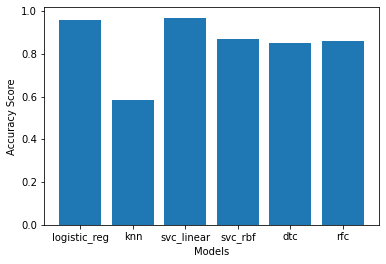

In [104]:
plt.bar(x=['logistic_reg','knn','svc_linear','svc_rbf','dtc','rfc'],height=[logistic_reg.score(x_test,y_test),knn.score(x_test,y_test),svc_linear.score(x_test,y_test),svc_rbf.score(x_test,y_test),dtc.score(x_test,y_test),rfc.score(x_test,y_test)])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

## SVM Classifier with linear kernel is giving the best model with accuracy with 0.96 (i.e.,96% accuracy)